In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
wine_df = pd.read_csv('winequality-red.csv')

In [3]:
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
wine_df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
wine_df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [7]:
wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='quality', ylabel='count'>

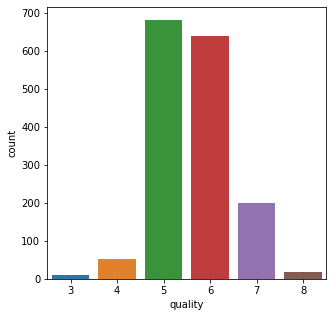

In [8]:
plt.figure(figsize = (5,5))
sns.countplot(wine_df['quality'])

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

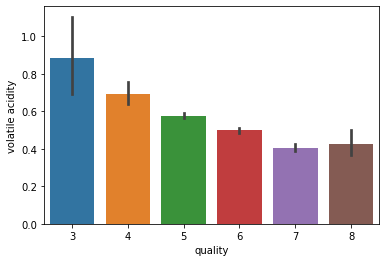

In [10]:
sns.barplot(data = wine_df, x = 'quality', y = 'volatile acidity')
#checking corr between volatile acidity and quality

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

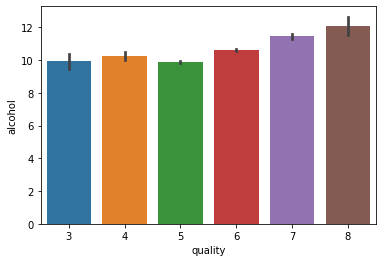

In [11]:
sns.barplot(data = wine_df, x = 'quality', y = 'alcohol') #directly proportional
#checking corr between alcohol and quality

<AxesSubplot:>

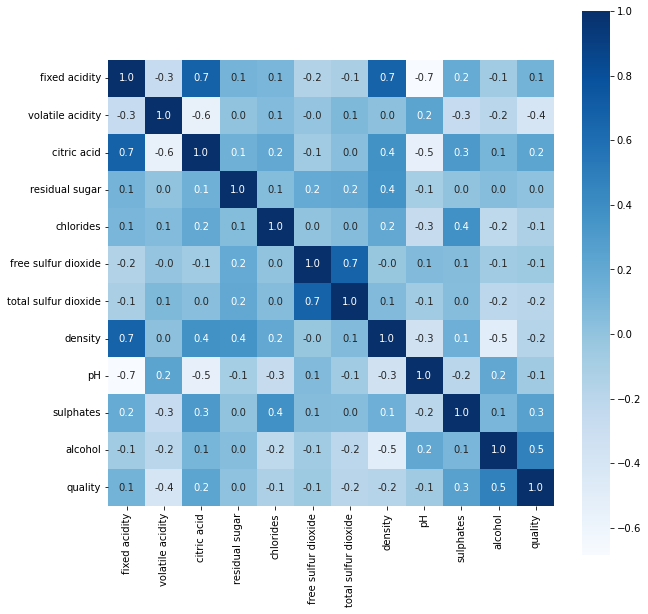

In [14]:
plt.figure(figsize = (10,10))
sns.heatmap(wine_df.corr(), cmap = 'Blues', cbar = True, square = True, fmt = '.1f', annot = True)

Splitting features and targets

In [15]:
X = wine_df.drop('quality', axis = 1)
Y = wine_df['quality']

In [17]:
print(X)
print(Y)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

Binary classification

In [21]:
Y = Y.apply(lambda x : 1 if x >=7 else 0)

In [22]:
Y.value_counts()

0    1382
1     217
Name: quality, dtype: int64

0 - If quality is <7 (Bad)
1 - If quality is >8 (Good)

Training and testing

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size = 0.2, stratify = Y, random_state = 2)

In [24]:
print(X.shape,X_train.shape, X_test.shape)

(1599, 11) (1279, 11) (320, 11)


In [25]:
model = RandomForestClassifier()

In [26]:
model.fit(X_train, Y_train)

RandomForestClassifier()

Evaluating 

In [27]:
X_train_prediction = model.predict(X_train)
X_train_accuracy_score = accuracy_score(X_train_prediction, Y_train)
print('Accuracy of training data is :',X_train_accuracy_score )

Accuracy of training data is : 1.0


In [28]:
X_test_prediction = model.predict(X_test)
X_test_accuracy_score = accuracy_score(X_test_prediction, Y_test)
print('Accuracy of testing data is :',X_test_accuracy_score )

Accuracy of testing data is : 0.9375


Predictive System

In [29]:
input_data = (7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4)

#converting into array
input_data_array = np.array(input_data)

#changing shape
input_data_array = input_data_array.reshape(1,-1)

#prediction
prediction = model.predict(input_data_array)

if prediction ==0 :
    print('wine quality is bad')
else :
    print('wine quality is good')

wine quality is bad
